In [1]:
# Libaries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, ComplementNB, CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Datastets

In [2]:
selectkbest30 = pd.read_csv('datasets/selectkbest30.csv')
selectkbest40 = pd.read_csv('datasets/selectkbest40.csv')
selectkbest50 = pd.read_csv('datasets/selectkbest50.csv')
selectkbest60 = pd.read_csv('datasets/selectkbest60.csv')
lasso = pd.read_csv('datasets/lasso.csv')
ridge = pd.read_csv('datasets/ridge.csv')
randomforest = pd.read_csv('datasets/randomforest.csv')

selectkbest30.head()

,rooms,exp_02,exp_03,exp_04,exp_05,exp_06,exp_07,exp_08,exp_09,exp_10,...,highest_edu_lvl,occupation_4_per_household,occupation_5_per_household,occupation_6_per_household,industry_1_per_household,industry_6_per_household,industry_11_per_household,percent_literate,statocc_2,urbrur_2
0,0.000000,0.149446,0.064862,0.063076,0.024648,0.025575,0.025533,0.022662,0.018584,0.005128,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
1,0.000000,0.065498,0.068346,0.022717,0.045188,0.033248,0.018472,0.058086,0.025364,0.012146,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
2,0.157895,0.054428,0.180113,0.147477,0.071009,0.089514,0.049640,0.128053,0.097187,0.048043,...,0.9,0.0,0.2,0.0,0.0,0.0,0.2,1.0,0,1
3,0.000000,0.160517,0.170464,0.114608,0.061228,0.115090,0.073818,0.130253,0.051231,0.020108,...,0.5,0.0,0.0,0.0,0.0,0.2,0.0,1.0,0,1
4,0.105263,0.075646,0.155186,0.222463,0.181925,0.077749,0.169175,0.113531,0.110246,0.036032,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1


### Data Splitting

In [3]:
# Splitting the datasets into training and testing sets

def split_data(data):
    X = data.drop('urbrur_2', axis=1)
    y = data['urbrur_2']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
    return X_train, X_test, y_train, y_test

### Training Models

In [4]:
# Training the Model1 Classifier

def train_random_forest_classifier(X_train, y_train, n_estimators=100, max_depth=None, random_state=2024):
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    clf.fit(X_train, y_train)
    return clf

In [5]:
# Training the Model2 Classifier

def train_gradient_boosting_classifier(X_train, y_train, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2024):
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate,
                                     max_depth=max_depth, random_state=random_state)
    clf.fit(X_train, y_train)
    return clf


In [6]:
# Training the Model3.1 Classifier

def train_svm_classifier(X_train, y_train, kernel, random_state=None):
    clf = SVC(kernel=kernel, C=1, gamma='scale', random_state=random_state)
    clf.fit(X_train, y_train)
    return clf

In [7]:
# Training the Model4.1 Classifier

def train_naive_bayes_classifier(X_train, y_train,clf):
    clf.fit(X_train, y_train)
    return clf

### Model Performances

In [8]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    confusion = confusion_matrix(y_test, predictions)
    
    return accuracy, precision, recall, f1, confusion, predictions

In [9]:
def feature_importance(model, X_train):
    
    df_features = pd.DataFrame(model.feature_importances_, columns = ['Importance'],
                               index = X_train.columns).sort_values('Importance', ascending = False).reset_index()
    df_features.rename(columns = {'index':'Variable'}, inplace = True)
    
    return df_features

In [10]:
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix')
    plt.show()
    
def plot_feature_importances(df_features):
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Importance', y='Variable', data=df_features)
    plt.xlabel('Percentage of Importance')
    plt.ylabel('Feature Names')
    plt.title('Feature Importances')
    plt.show()
    
def plot_metrics(metrics, metric_names):
    plt.figure(figsize=(8, 6))
    sns.barplot(x=metric_names, y=metrics)
    plt.title('Model Performance Metrics')
    plt.show()

In [11]:
def split_confusion_matrix(conf_matrix):
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TP = conf_matrix[1, 1]
    return TN, FP, FN, TP

### Model Evaluation for all Combinations

In [12]:
# Evaluate all models
def combined_evaluation(data):
    
    X_train, X_test, y_train, y_test = split_data(data)
    
    rf_trained_model = train_random_forest_classifier(X_train, y_train)
    gb_trained_model = train_gradient_boosting_classifier(X_train, y_train)
    svm_trained_model_line = train_svm_classifier(X_train, y_train, 'linear')
    svm_trained_model_poly = train_svm_classifier(X_train, y_train, 'poly')
    svm_trained_model_rbf = train_svm_classifier(X_train, y_train, 'rbf')
    svm_trained_model_sig = train_svm_classifier(X_train, y_train, 'sigmoid')
    nb_trained_model_mult = train_naive_bayes_classifier(X_train, y_train,MultinomialNB())
    nb_trained_model_comp = train_naive_bayes_classifier(X_train, y_train,ComplementNB())
    nb_trained_model_bern = train_naive_bayes_classifier(X_train, y_train,BernoulliNB())
    nb_trained_model_gaus = train_naive_bayes_classifier(X_train, y_train,GaussianNB())
    
    rf_accuracy, rf_precision, rf_recall, rf_f1, rf_confusion_matrix, rf_predicts = evaluate_model(rf_trained_model, X_test, y_test)
    rf_df_features = feature_importance(rf_trained_model, X_train)
    rf_TN, rf_FP, rf_FN, rf_TP = split_confusion_matrix(rf_confusion_matrix)
    rf_results = [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_TN, rf_FP, rf_FN, rf_TP, rf_predicts]
    
    gb_accuracy, gb_precision, gb_recall, gb_f1, gb_confusion_matrix, gb_predicts = evaluate_model(gb_trained_model, X_test, y_test)
    gb_df_features = feature_importance(gb_trained_model, X_train)
    gb_TN, gb_FP, gb_FN, gb_TP = split_confusion_matrix(gb_confusion_matrix)
    gb_results = [gb_accuracy, gb_precision, gb_recall, gb_f1, gb_TN, gb_FP, gb_FN, gb_TP, gb_predicts]
    
    svm_line_accuracy, svm_line_precision, svm_line_recall, svm_line_f1, svm_line_confusion_matrix, svm_line_predicts = evaluate_model(svm_trained_model_line, X_test, y_test)
    svm_line_TN, svm_line_FP, svm_line_FN, svm_line_TP = split_confusion_matrix(svm_line_confusion_matrix)
    svm_line_results = [svm_line_accuracy, svm_line_precision, svm_line_recall, svm_line_f1, svm_line_TN, svm_line_FP, svm_line_FN, svm_line_TP, svm_line_predicts]
    
    svm_poly_accuracy, svm_poly_precision, svm_poly_recall, svm_poly_f1, svm_poly_confusion_matrix, svm_poly_predicts = evaluate_model(svm_trained_model_poly, X_test, y_test)
    svm_poly_TN, svm_poly_FP, svm_poly_FN, svm_poly_TP = split_confusion_matrix(svm_poly_confusion_matrix)
    svm_poly_results = [svm_poly_accuracy, svm_poly_precision, svm_poly_recall, svm_poly_f1, svm_poly_TN, svm_poly_FP, svm_poly_FN, svm_poly_TP, svm_poly_predicts]
    
    svm_rbf_accuracy, svm_rbf_precision, svm_rbf_recall, svm_rbf_f1, svm_rbf_confusion_matrix, svm_rbf_predicts = evaluate_model(svm_trained_model_rbf, X_test, y_test)
    svm_rbf_TN, svm_rbf_FP, svm_rbf_FN, svm_rbf_TP = split_confusion_matrix(svm_rbf_confusion_matrix)
    svm_rbf_results = [svm_rbf_accuracy, svm_rbf_precision, svm_rbf_recall, svm_rbf_f1, svm_rbf_TN, svm_rbf_FP, svm_rbf_FN, svm_rbf_TP, svm_rbf_predicts]
    
    svm_sig_accuracy, svm_sig_precision, svm_sig_recall, svm_sig_f1, svm_sig_confusion_matrix, svm_sig_predicts = evaluate_model(svm_trained_model_sig, X_test, y_test)
    svm_sig_TN, svm_sig_FP, svm_sig_FN, svm_sig_TP = split_confusion_matrix(svm_sig_confusion_matrix)
    svm_sig_results = [svm_sig_accuracy, svm_sig_precision, svm_sig_recall, svm_sig_f1, svm_sig_TN, svm_sig_FP, svm_sig_FN, svm_sig_TP, svm_sig_predicts]
    
    nb_mult_accuracy, nb_mult_precision, nb_mult_recall, nb_mult_f1, nb_mult_confusion_matrix, nb_mult_predicts = evaluate_model(nb_trained_model_mult, X_test, y_test)
    nb_mult_TN, nb_mult_FP, nb_mult_FN, nb_mult_TP = split_confusion_matrix(nb_mult_confusion_matrix)
    nb_mult_results = [nb_mult_accuracy, nb_mult_precision, nb_mult_recall, nb_mult_f1, nb_mult_TN, nb_mult_FP, nb_mult_FN, nb_mult_TP, nb_mult_predicts]
    
    nb_comp_accuracy, nb_comp_precision, nb_comp_recall, nb_comp_f1, nb_comp_confusion_matrix, nb_comp_predicts = evaluate_model(nb_trained_model_comp, X_test, y_test)
    nb_comp_TN, nb_comp_FP, nb_comp_FN, nb_comp_TP = split_confusion_matrix(nb_comp_confusion_matrix)
    nb_comp_results = [nb_comp_accuracy, nb_comp_precision, nb_comp_recall, nb_comp_f1, nb_comp_TN, nb_comp_FP, nb_comp_FN, nb_comp_TP, nb_comp_predicts]
    
    nb_bern_accuracy, nb_bern_precision, nb_bern_recall, nb_bern_f1, nb_bern_confusion_matrix, nb_bern_predicts = evaluate_model(nb_trained_model_bern, X_test, y_test)
    nb_bern_TN, nb_bern_FP, nb_bern_FN, nb_bern_TP = split_confusion_matrix(nb_bern_confusion_matrix)
    nb_bern_results = [nb_bern_accuracy, nb_bern_precision, nb_bern_recall, nb_bern_f1, nb_bern_TN, nb_bern_FP, nb_bern_FN, nb_bern_TP, nb_bern_predicts]
    
    nb_gaus_accuracy, nb_gaus_precision, nb_gaus_recall, nb_gaus_f1, nb_gaus_confusion_matrix, nb_gaus_predicts = evaluate_model(nb_trained_model_gaus, X_test, y_test)
    nb_gaus_TN, nb_gaus_FP, nb_gaus_FN, nb_gaus_TP = split_confusion_matrix(nb_gaus_confusion_matrix)
    nb_gaus_results = [nb_gaus_accuracy, nb_gaus_precision, nb_gaus_recall, nb_gaus_f1, nb_gaus_TN, nb_gaus_FP, nb_gaus_FN, nb_gaus_TP, nb_gaus_predicts]

    
    return rf_results, gb_results, svm_line_results, svm_poly_results, svm_rbf_results, svm_sig_results, nb_mult_results, nb_comp_results, nb_bern_results, nb_gaus_results


In [13]:
results_df = pd.DataFrame(columns=['Dataset', 'Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'TN', 'FP', 'FN', 'TP', 'Predictions'])

In [14]:
def add_results_to_df(results, dataset, model):
    results_df.loc[len(results_df)] = [dataset, model, results[0], results[1], results[2], results[3], results[4], results[5], results[6], results[7], results[8]]
    

In [15]:
# SelectKBest30
rf_results, gb_results, svm_line_results, svm_poly_results, svm_rbf_results, svm_sig_results, nb_mult_results, nb_comp_results, nb_bern_results, nb_gaus_results = combined_evaluation(selectkbest30)
add_results_to_df(rf_results, 'SelectKBest30', 'Random Forest')
add_results_to_df(gb_results, 'SelectKBest30', 'Gradient Boosting')
add_results_to_df(svm_line_results, 'SelectKBest30', 'SVM Linear')
add_results_to_df(svm_poly_results, 'SelectKBest30', 'SVM Polynomial')
add_results_to_df(svm_rbf_results, 'SelectKBest30', 'SVM RBF')
add_results_to_df(svm_sig_results, 'SelectKBest30', 'SVM Sigmoid')
add_results_to_df(nb_mult_results, 'SelectKBest30', 'Naive Bayes Multinomial')
add_results_to_df(nb_comp_results, 'SelectKBest30', 'Naive Bayes Complement')
add_results_to_df(nb_bern_results, 'SelectKBest30', 'Naive Bayes Bernoulli')
add_results_to_df(nb_gaus_results, 'SelectKBest30', 'Naive Bayes Gaussian')

# SelectKBest40
rf_results, gb_results, svm_line_results, svm_poly_results, svm_rbf_results, svm_sig_results, nb_mult_results, nb_comp_results, nb_bern_results, nb_gaus_results = combined_evaluation(selectkbest40)
add_results_to_df(rf_results, 'SelectKBest40', 'Random Forest')
add_results_to_df(gb_results, 'SelectKBest40', 'Gradient Boosting')
add_results_to_df(svm_line_results, 'SelectKBest40', 'SVM Linear')
add_results_to_df(svm_poly_results, 'SelectKBest40', 'SVM Polynomial')
add_results_to_df(svm_rbf_results, 'SelectKBest40', 'SVM RBF')
add_results_to_df(svm_sig_results, 'SelectKBest40', 'SVM Sigmoid')
add_results_to_df(nb_mult_results, 'SelectKBest40', 'Naive Bayes Multinomial')
add_results_to_df(nb_comp_results, 'SelectKBest40', 'Naive Bayes Complement')
add_results_to_df(nb_bern_results, 'SelectKBest40', 'Naive Bayes Bernoulli')
add_results_to_df(nb_gaus_results, 'SelectKBest40', 'Naive Bayes Gaussian')


# SelectKBest50
rf_results, gb_results, svm_line_results, svm_poly_results, svm_rbf_results, svm_sig_results, nb_mult_results, nb_comp_results, nb_bern_results, nb_gaus_results = combined_evaluation(selectkbest50)
add_results_to_df(rf_results, 'SelectKBest50', 'Random Forest')
add_results_to_df(gb_results, 'SelectKBest50', 'Gradient Boosting')
add_results_to_df(svm_line_results, 'SelectKBest50', 'SVM Linear')
add_results_to_df(svm_poly_results, 'SelectKBest50', 'SVM Polynomial')
add_results_to_df(svm_rbf_results, 'SelectKBest50', 'SVM RBF')
add_results_to_df(svm_sig_results, 'SelectKBest50', 'SVM Sigmoid')
add_results_to_df(nb_mult_results, 'SelectKBest50', 'Naive Bayes Multinomial')
add_results_to_df(nb_comp_results, 'SelectKBest50', 'Naive Bayes Complement')
add_results_to_df(nb_bern_results, 'SelectKBest50', 'Naive Bayes Bernoulli')
add_results_to_df(nb_gaus_results, 'SelectKBest50', 'Naive Bayes Gaussian')


# SelectKBest60
rf_results, gb_results, svm_line_results, svm_poly_results, svm_rbf_results, svm_sig_results, nb_mult_results, nb_comp_results, nb_bern_results, nb_gaus_results = combined_evaluation(selectkbest60)
add_results_to_df(rf_results, 'SelectKBest60', 'Random Forest')
add_results_to_df(gb_results, 'SelectKBest60', 'Gradient Boosting')
add_results_to_df(svm_line_results, 'SelectKBest60', 'SVM Linear')
add_results_to_df(svm_poly_results, 'SelectKBest60', 'SVM Polynomial')
add_results_to_df(svm_rbf_results, 'SelectKBest60', 'SVM RBF')
add_results_to_df(svm_sig_results, 'SelectKBest60', 'SVM Sigmoid')
add_results_to_df(nb_mult_results, 'SelectKBest60', 'Naive Bayes Multinomial')
add_results_to_df(nb_comp_results, 'SelectKBest60', 'Naive Bayes Complement')
add_results_to_df(nb_bern_results, 'SelectKBest60', 'Naive Bayes Bernoulli')
add_results_to_df(nb_gaus_results, 'SelectKBest60', 'Naive Bayes Gaussian')


# Lasso
rf_results, gb_results, svm_line_results, svm_poly_results, svm_rbf_results, svm_sig_results, nb_mult_results, nb_comp_results, nb_bern_results, nb_gaus_results = combined_evaluation(lasso)
add_results_to_df(rf_results, 'Lasso', 'Random Forest')
add_results_to_df(gb_results, 'Lasso', 'Gradient Boosting')
add_results_to_df(svm_line_results, 'Lasso', 'SVM Linear')
add_results_to_df(svm_poly_results, 'Lasso', 'SVM Polynomial')
add_results_to_df(svm_rbf_results, 'Lasso', 'SVM RBF')
add_results_to_df(svm_sig_results, 'Lasso', 'SVM Sigmoid')
add_results_to_df(nb_mult_results, 'Lasso', 'Naive Bayes Multinomial')
add_results_to_df(nb_comp_results, 'Lasso', 'Naive Bayes Complement')
add_results_to_df(nb_bern_results, 'Lasso', 'Naive Bayes Bernoulli')
add_results_to_df(nb_gaus_results, 'Lasso', 'Naive Bayes Gaussian')


# Ridge
rf_results, gb_results, svm_line_results, svm_poly_results, svm_rbf_results, svm_sig_results, nb_mult_results, nb_comp_results, nb_bern_results, nb_gaus_results = combined_evaluation(ridge)
add_results_to_df(rf_results, 'Ridge', 'Random Forest')
add_results_to_df(gb_results, 'Ridge', 'Gradient Boosting')
add_results_to_df(svm_line_results, 'Ridge', 'SVM Linear')
add_results_to_df(svm_poly_results, 'Ridge', 'SVM Polynomial')
add_results_to_df(svm_rbf_results, 'Ridge', 'SVM RBF')
add_results_to_df(svm_sig_results, 'Ridge', 'SVM Sigmoid')
add_results_to_df(nb_mult_results, 'Ridge', 'Naive Bayes Multinomial')
add_results_to_df(nb_comp_results, 'Ridge', 'Naive Bayes Complement')
add_results_to_df(nb_bern_results, 'Ridge', 'Naive Bayes Bernoulli')
add_results_to_df(nb_gaus_results, 'Ridge', 'Naive Bayes Gaussian')


# Random Forest
rf_results, gb_results, svm_line_results, svm_poly_results, svm_rbf_results, svm_sig_results, nb_mult_results, nb_comp_results, nb_bern_results, nb_gaus_results = combined_evaluation(randomforest)
add_results_to_df(rf_results, 'Random Forest', 'Random Forest')
add_results_to_df(gb_results, 'Random Forest', 'Gradient Boosting')
add_results_to_df(svm_line_results, 'Random Forest', 'SVM Linear')
add_results_to_df(svm_poly_results, 'Random Forest', 'SVM Polynomial')
add_results_to_df(svm_rbf_results, 'Random Forest', 'SVM RBF')
add_results_to_df(svm_sig_results, 'Random Forest', 'SVM Sigmoid')
add_results_to_df(nb_mult_results, 'Random Forest', 'Naive Bayes Multinomial')
add_results_to_df(nb_comp_results, 'Random Forest', 'Naive Bayes Complement')
add_results_to_df(nb_bern_results, 'Random Forest', 'Naive Bayes Bernoulli')
add_results_to_df(nb_gaus_results, 'Random Forest', 'Naive Bayes Gaussian')



In [16]:
results_df.head(70)

,Dataset,Model,Accuracy,Precision,Recall,F1 Score,TN,FP,FN,TP,Predictions
0,SelectKBest30,Random Forest,0.885417,0.885641,0.885417,0.885054,900,165,110,1225,"[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, ..."
1,SelectKBest30,Gradient Boosting,0.890417,0.890568,0.890417,0.890114,909,156,107,1228,"[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, ..."
2,SelectKBest30,SVM Linear,0.877917,0.878340,0.877917,0.877428,885,180,113,1222,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, ..."
3,SelectKBest30,SVM Polynomial,0.884583,0.885126,0.884583,0.884725,941,124,153,1182,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, ..."
4,SelectKBest30,SVM RBF,0.875417,0.875916,0.875417,0.874882,880,185,114,1221,"[1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...,...,...,...,...,...
65,Random Forest,SVM Sigmoid,0.611667,0.610243,0.611667,0.610768,578,487,445,890,"[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, ..."
66,Random Forest,Naive Bayes Multinomial,0.825000,0.833016,0.825000,0.821582,745,320,100,1235,"[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, ..."
67,Random Forest,Naive Bayes Complement,0.817083,0.816786,0.817083,0.816530,819,246,193,1142,"[1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, ..."
68,Random Forest,Naive Bayes Bernoulli,0.779583,0.789773,0.779583,0.773536,663,402,127,1208,"[1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, ..."


In [17]:
# Find the best model & dataset combination

best_model = results_df[results_df['Accuracy'] == results_df['Accuracy'].max()]
best_model

,Dataset,Model,Accuracy,Precision,Recall,F1 Score,TN,FP,FN,TP,Predictions
63,Random Forest,SVM Polynomial,0.9025,0.902566,0.9025,0.902527,951,114,120,1215,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, ..."


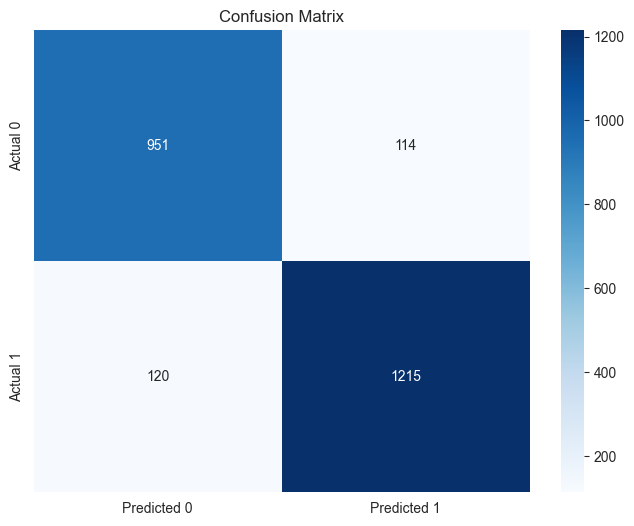

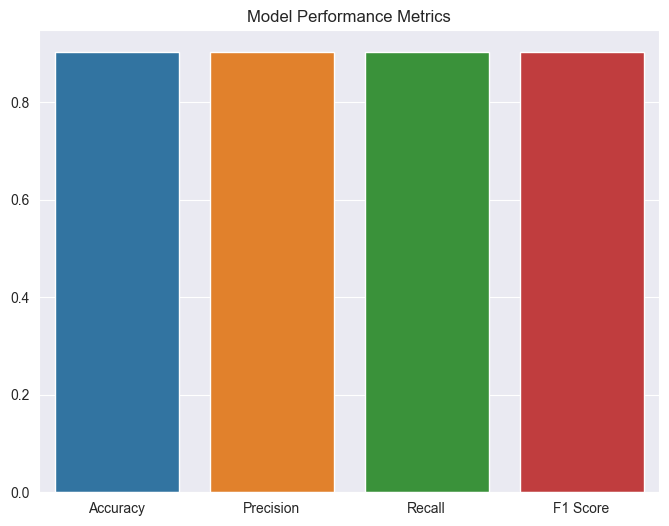

In [18]:
# Plot the best model's confusion matrix 

X_train, X_test, y_train, y_test = split_data(randomforest)
svm_trained_model_poly = train_svm_classifier(X_train, y_train, 'poly', random_state=2024)
accuracy, precision, recall, f1, confusion_matrix, predictions = evaluate_model(svm_trained_model_poly, X_test, y_test)

plot_confusion_matrix(confusion_matrix)

metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plot_metrics(metrics, metric_names)

In [19]:
# Find the second & third best model & dataset combination

second_best_model = results_df[results_df['Accuracy'] == results_df['Accuracy'].sort_values(ascending=False).unique()[1]]
third_best_model = results_df[results_df['Accuracy'] == results_df['Accuracy'].sort_values(ascending=False).unique()[2]]
forth_best_model = results_df[results_df['Accuracy'] == results_df['Accuracy'].sort_values(ascending=False).unique()[3]]
fifth_best_model = results_df[results_df['Accuracy'] == results_df['Accuracy'].sort_values(ascending=False).unique()[4]]
fifth_best_model

,Dataset,Model,Accuracy,Precision,Recall,F1 Score,TN,FP,FN,TP,Predictions
60,Random Forest,Random Forest,0.892083,0.89259,0.892083,0.891667,903,162,97,1238,"[1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, ..."


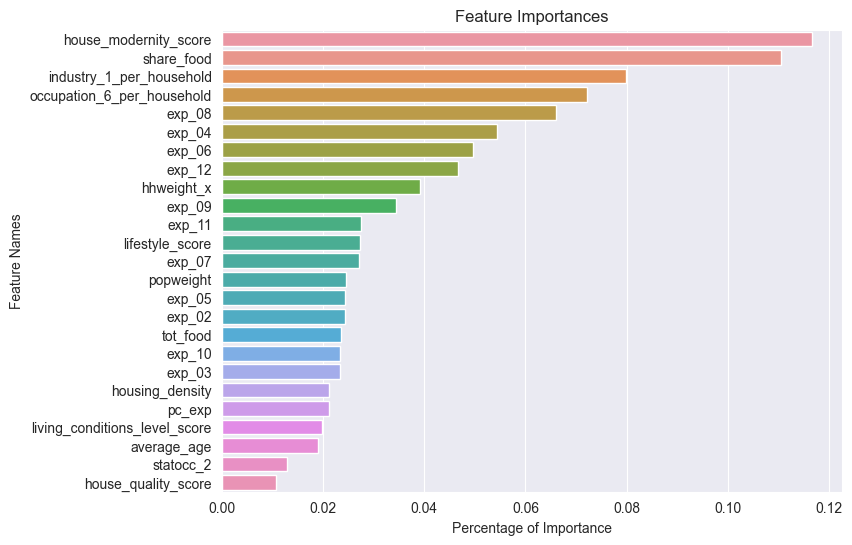

In [20]:
# Plot fifth best model's confusion matrix

X_train, X_test, y_train, y_test = split_data(randomforest)
rf_trained_model = train_random_forest_classifier(X_train, y_train)

df_features = feature_importance(rf_trained_model, X_train)
plot_feature_importances(df_features)

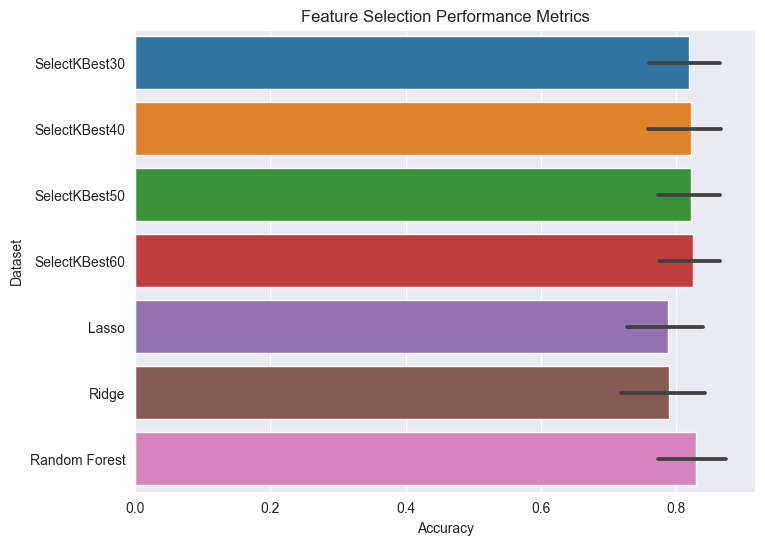

In [29]:
# Plot the feature selection performances

plt.figure(figsize=(8, 6))
sns.barplot(x='Accuracy', y='Dataset', data=results_df)
plt.title('Feature Selection Performance Metrics')
plt.show()

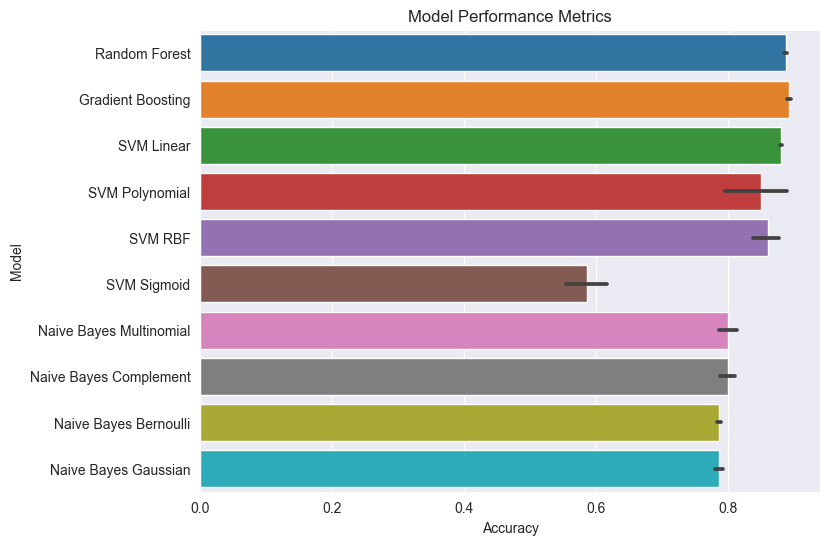

In [22]:
# Plot the model performances

plt.figure(figsize=(8, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df)
plt.title('Model Performance Metrics')
plt.show()

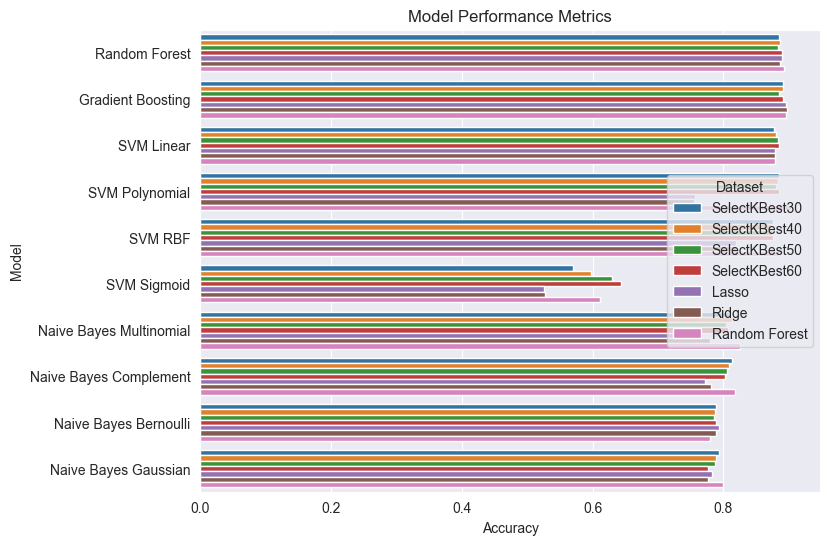

In [23]:
# Plot the combination performances

plt.figure(figsize=(8, 6))
sns.barplot(x='Accuracy', y='Model', hue='Dataset', data=results_df)
plt.title('Model Performance Metrics')
plt.show()

In [24]:
results_df.to_csv('datasets/results.csv', index=False)